# Ordinary Least Squares

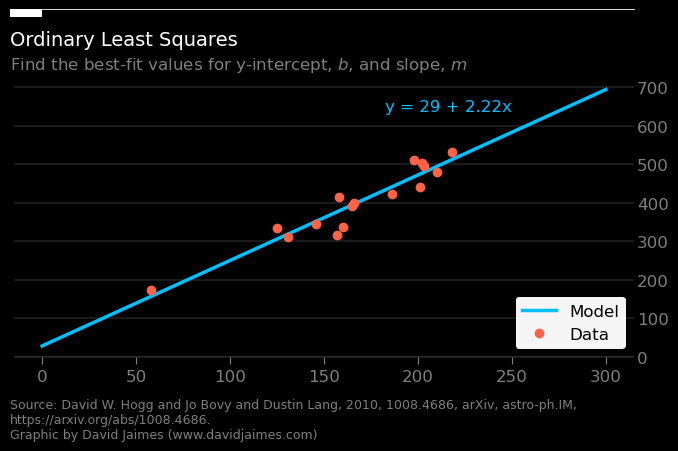

In [37]:
import matplotlib.pyplot as plt
import numpy
import pandas
from mpl_style import pro
plt.style.use(pro)

df = pandas.read_csv('table1.dat', sep=' ', usecols=[1, 2])
df = df[4:]
n = len(df)

Y = df.y.values.reshape((n, 1))
X = numpy.matrix([numpy.ones(n), df.x]).T
inv = numpy.linalg.inv
B = (inv(X.T @ X)) @ (X.T @ Y)
b, m = B.item(0), B.item(1)

fig, ax = plt.subplots()
xf = numpy.linspace(0, 300)
yf = b + m * xf

blue = 'deepskyblue'
ax.yaxis.tick_right()
ax.text(x=0.12, y=.89,
    s="Ordinary Least Squares",
    transform=fig.transFigure,
    ha='left',
    fontsize=14,
    color='w')
ax.text(x=0.12, y=.83,
    s=r"Find the best-fit values for y-intercept, $b$, and slope, $m$",
    transform=fig.transFigure,
    ha='left',
    fontsize=12,
    color='C7')
ax.text(x=0.12, y=-0.1,
    s="""Source: David W. Hogg and Jo Bovy and Dustin Lang, 2010, 1008.4686, arXiv, astro-ph.IM,\nhttps://arxiv.org/abs/1008.4686.\nGraphic by David Jaimes (www.davidjaimes.com)""",
    transform=fig.transFigure,
    ha='left',
    va='bottom',
    fontsize=9,
    color='C7')



ax.plot([0.12, .9],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='w', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           transform=fig.transFigure, 
                           clip_on=False))

ax.plot(xf, yf, blue, label='Model')
ax.plot(df.x, df.y, ls='none', marker='.', ms=12,
            zorder=3, label='Data', lw=1.5, color='tomato')

ax.text(250, 650, rf'y = {b:.0f} + {m:.2f}x',
       size=12, color=blue, va='center', ha='right')

ax.set_ylim(0, 799)
ax.legend(loc=4)
plt.savefig("exercise0.png")

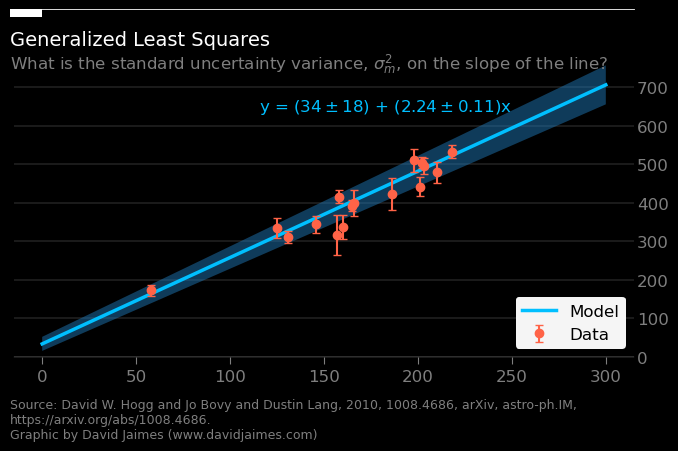

In [8]:
import matplotlib.pyplot as plt
import numpy
import pandas
from mpl_style import pro
plt.style.use(pro)

df = pandas.read_csv('table1.dat', sep=' ', usecols=[1,2,3])
df = df[4:]
n = len(df)

Y = df.y.values.reshape((n, 1))
X = numpy.matrix([numpy.ones(n), df.x]).T
C = numpy.diag(pow(df.sig_y.values, 2))
inv = numpy.linalg.inv
b1 = inv(X.T @ inv(C) @ X)
b2 = X.T @ inv(C) @ Y
B = b1 @ b2
b, m = B.item(0), B.item(1)
sig_b = numpy.sqrt(b1.item(0))
sig_m = numpy.sqrt(b1.item(3))

fig, ax = plt.subplots()
xf = numpy.linspace(0, 300)
yf = b + m * xf
y1_err = (b - sig_b) + (m - sig_m) * xf
y2_err = (b + sig_b) + (m + sig_m) * xf 

blue = 'deepskyblue'
ax.yaxis.tick_right()
ax.text(x=0.12, y=.89,
    s="Generalized Least Squares",
    transform=fig.transFigure,
    ha='left',
    fontsize=14,
    color='w')
ax.text(x=0.12, y=.83,
    s=r"What is the standard uncertainty variance, $\sigma^2_m$, on the slope of the line?",
    transform=fig.transFigure,
    ha='left',
    fontsize=12,
    color='C7')
ax.text(x=0.12, y=-0.1,
    s="""Source: David W. Hogg and Jo Bovy and Dustin Lang, 2010, 1008.4686, arXiv, astro-ph.IM,\nhttps://arxiv.org/abs/1008.4686.\nGraphic by David Jaimes (www.davidjaimes.com)""",
    transform=fig.transFigure,
    ha='left',
    va='bottom',
    fontsize=9,
    color='C7')


ax.fill_between(xf, y1_err, y2_err, alpha=0.5)
ax.plot([0.12, .9],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='w', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           transform=fig.transFigure, 
                           clip_on=False))

ax.plot(xf, yf, blue, label='Model')
ax.errorbar(df.x, df.y, df.sig_y, ls='none', marker='.', ms=12,
            zorder=3, label='Data', lw=1.5, color='tomato')

ax.text(250, 650, rf'y = $({b:.0f} \pm {sig_b:.0f})$ + $({m:.2f} \pm {sig_m:.2f})$x',
       size=12, color=blue, va='center', ha='right')

ax.set_ylim(0, 799)
ax.legend(loc=4)
plt.savefig("exercise1.png")

1.9665805472735634